# BoomBikes - Bike Sharing Assignment

## Problem Statement:
    
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Objective:

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
   

## Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

#### Importing the required libraries

In [102]:
import pandas as pd
import numpy as np
import calendar

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings(action = 'ignore')


#### Reading the dataset file - day.csv

In [3]:
# 'day_df' is the dataframe name, which is used to access the dataset i.e. from day.csv
day_df = pd.read_csv("day.csv")

#### Displaying the first five rows of the dataset

In [4]:
# head() is used to display the top rows of the dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Checking the shape of the dataframe

In [5]:
# Shape is used to display the rows,columns in the dataset
day_df.shape

(730, 16)

#### Checking the datatypes of all the columns of the dataframe

In [6]:
# Info displays the datatypes of all the columns of the dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Check for the number of null values in the columns

In [7]:
# Displaying the number of null values in the columns
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Displaying the descriptive statistics of the numrical columns of the dataset.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning and Manipulation
 
#### Droping the columns which doesn't contribute to the analysis.
- __instant__: This is an index column, and we already have a default index for the same purpose.
- __dteday__: This column contains dates. Since we already have separate columns for year and month, we can conduct our analysis without this column.
- __casual and registered__: These columns contain the count of bikes booked by different categories of customers. Since our objective is to find the total count of bikes, not by specific category, we will ignore these two columns.

In [9]:
# Listing all the columns in the dataset
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Droping the columns from the dataset - 'instant', 'dteday', 'casual', 'registered'
day_df.drop(['instant', 'dteday', 'casual', 'registered'],axis=1, inplace=True)

In [11]:
# Checking the information of the dataset after droping the columns
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
# Listing the top 5 rows from the dataset
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Mapping categorical values to their corresponding string values as specified in the data dictionary.

__List of columns:__
- season(1:spring, 2:summer, 3:fall, 4:winter)
- mnth(Month)(1:January, 2:February, 3:March.....11:November, 12:December)
- weekday(0:Sunday, 1:Monday, 2:Tuesday..... 5:Friday, 6:Saturday)
- weathersit - To make the data set clearer, we used a single word to describe the weather condition for the mapped values as follows:
  - 1: Good - Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Moderate - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Bad - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Severe - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [13]:
# Checking the count of different values under the column 'season'.
day_df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [14]:
# Mapping the numerical values to their corresponding season names as specified in the data dictionary.
day_df['season'] = day_df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [15]:
# Confirming the count of different values under the column 'season' after mapping to the season names.
day_df['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [16]:
# Checking the count of different values under the column 'mnth'.
day_df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [17]:
# Mapping the numerical values to their corresponding month names by importing calender module.
day_df['mnth'] = day_df['mnth'].apply(lambda x: calendar.month_name[x])

In [18]:
# Confirming the count of different values under the column 'mnth' after mapping to the month names.
day_df['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [19]:
# Checking the count of different values under the column 'weekdays'.
day_df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [20]:
# Mapping the numerical values to their corresponding weekday names as specified: {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}.
day_df['weekday'] = day_df['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

In [21]:
# Confirming the count of different values under the column 'weekday' after mapping to the weekday names.
day_df['weekday'].value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [22]:
# Checking the count of different values under the column 'season'.
day_df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [23]:
# Mapping the numerical values to their corresponding weather conditons as specified:{1:'Good', 2:'Moderate', 3:'Bad', 4:'Severe'}
day_df['weathersit'] = day_df['weathersit'].map({1:'Good', 2:'Moderate', 3:'Bad', 4:'Severe'})

In [24]:
# Confirming the count of different values under the column 'weathersit' after mapping.
day_df['weathersit'].value_counts()

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

In [25]:
# Verifying the dataframe after mapping categorical values to their corresponding string values.
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Handling outliers

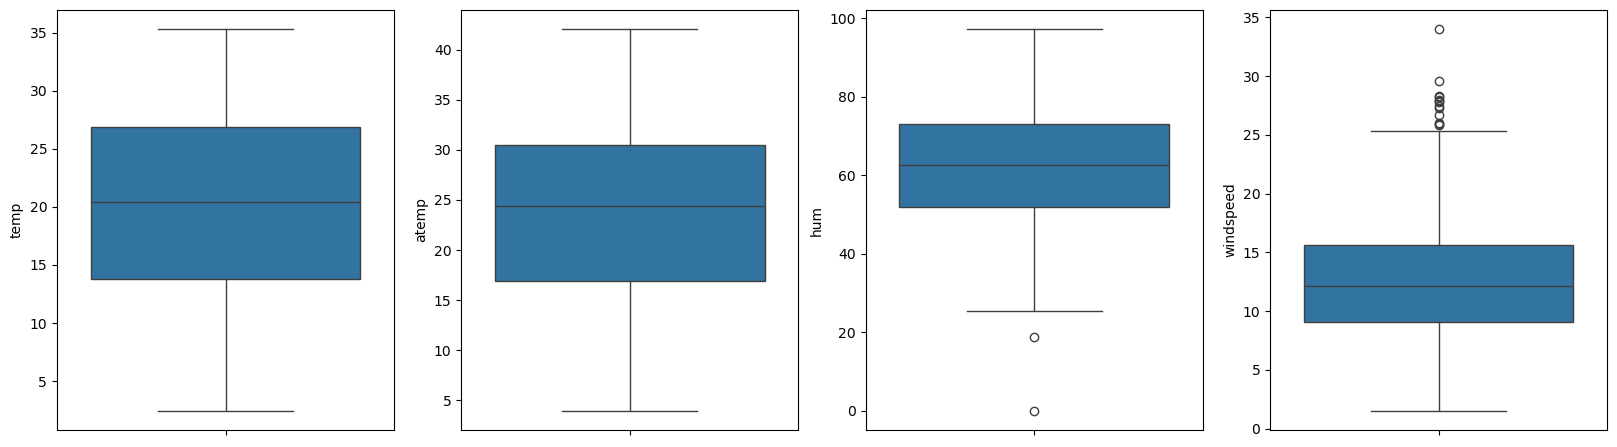

In [26]:
# Ploting the box plots from the columns - temp, atemp, hum and windspeed to check the outliers.
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(y='temp', data = day_df)
plt.subplot(2,4,2)
sns.boxplot(y='atemp', data = day_df)
plt.subplot(2,4,3)
sns.boxplot(y='hum', data = day_df)
plt.subplot(2,4,4)
sns.boxplot(y='windspeed', data = day_df)
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis
- We have four continous numerical variables i.e. temp, atemp, hum and windspeed
- we have seven categorical variables i.e. season, yr(year), mnth(month), holiday, weekday, workingday, 'weathersi'

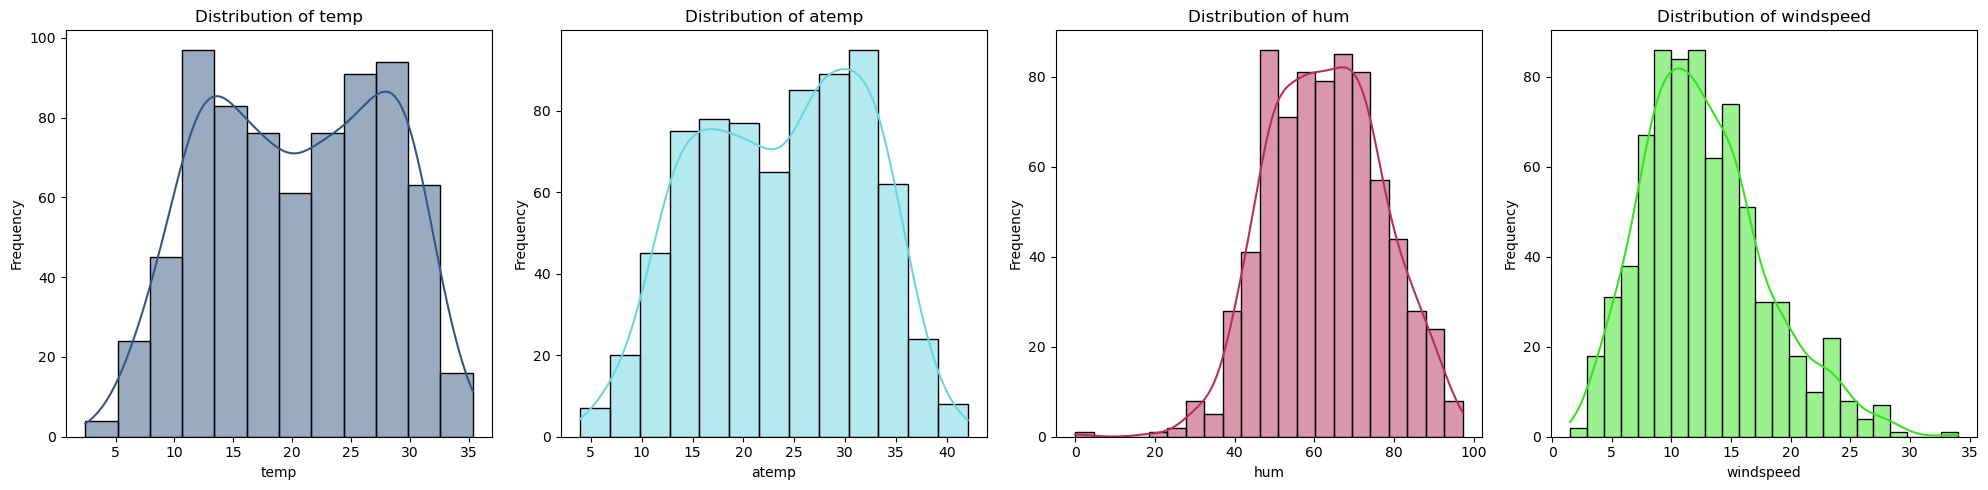

In [27]:
# Importing random variable to use random colours for the graphs
import random

# List of continuous numerical variables
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Function to generate a random color
def random_color():
    return (random.random(), random.random(), random.random())

# Creating subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Ploting each numerical variable with random colors
for i, var in enumerate(continuous_vars):
    sns.histplot(day_df[var], kde=True, ax=axes[i], color=random_color())
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()

#### Analysis from the above graphs:
- The average temperature during which bikes were rented was around 20°C.
- The average perceived temperature during bike rentals was around 24°C.
- The average humidity levels during bike rentals were approximately 63%.
- The average windspeed during bike rentals was about 13 km/h.

In [28]:
def create_plot_bar(df, column, title='Bar Plot', xlabel='X-axis', ylabel='Y-axis'):
    """
    Function to plot a bar plot.
    
    Parameters:
    df (dataframe): A list of values for the bars.
    title (str): The title of the plot. Default is 'Bar Plot'.
    xlabel (str): The label for the x-axis. Default is 'X-axis'.
    ylabel (str): The label for the y-axis. Default is 'Y-axis'.
    
    Returns:
    None
    """

    # Calulating the count of value and storing in the variable - "col"
    col = df[column].value_counts()
    
    # Creating a colormap
    cmap = plt.get_cmap('magma')
    colors = [cmap(i / len(col)) for i in range(len(col))]

    # Creating a bar plot with the colormap
    plt.figure(figsize=(10, 6))
    col.plot(kind = 'bar', color=colors)

    # Displaying the value on the top of each bin
    for i, value in enumerate(col):
        plt.text(i, value + 0.1, str(value), ha='center')

    # Adding labels and title to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Showing the plot
    plt.show()

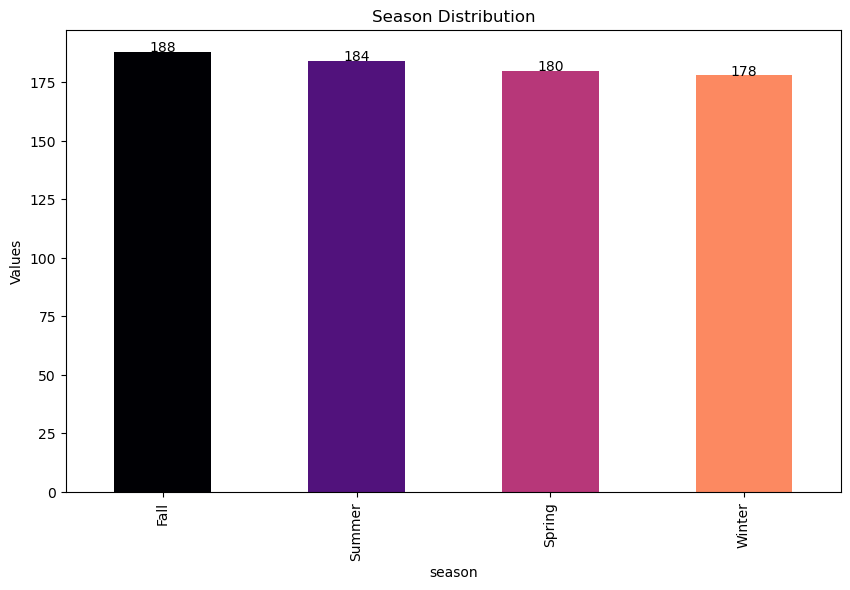

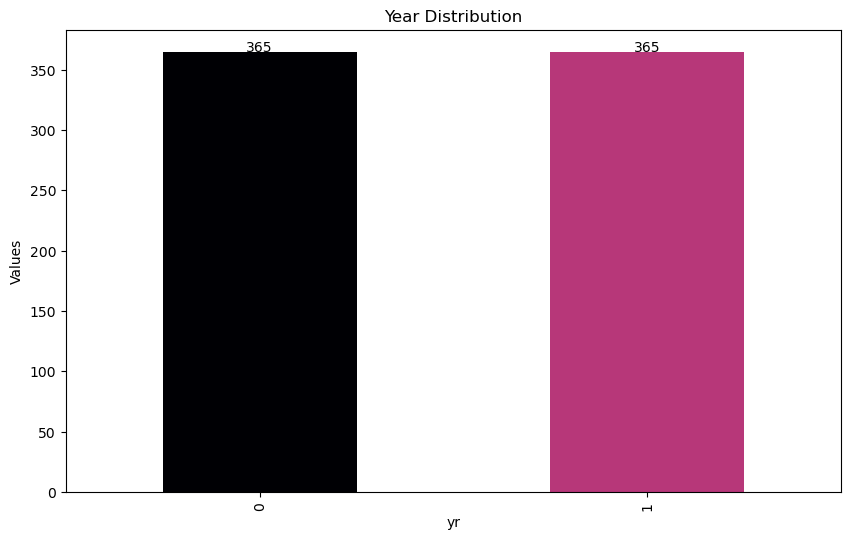

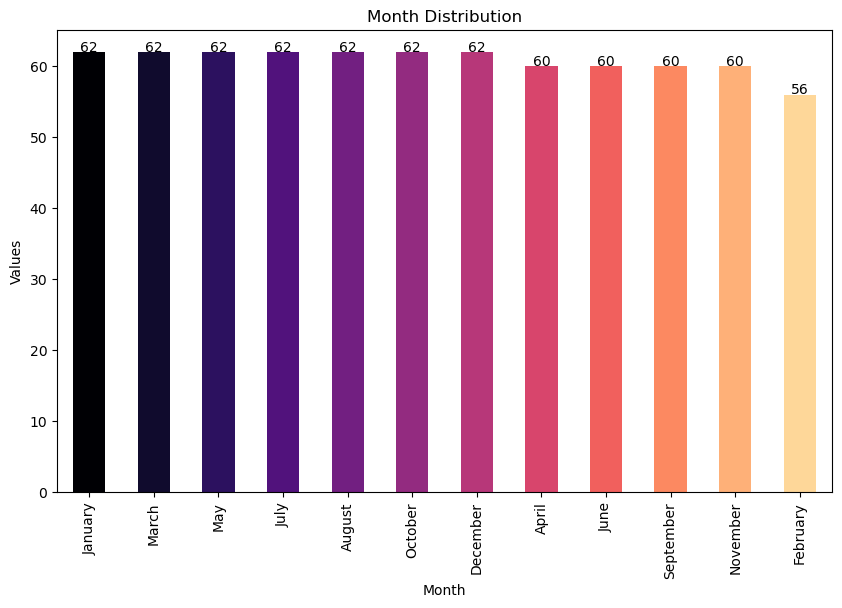

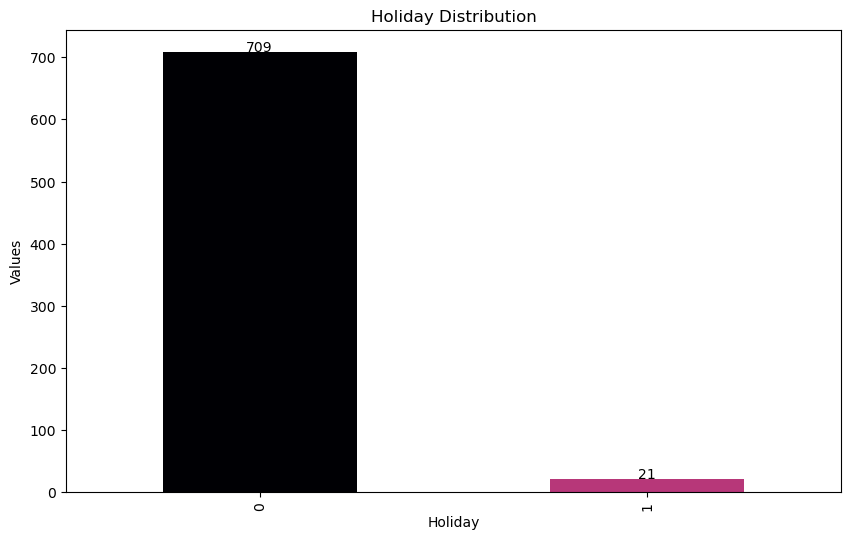

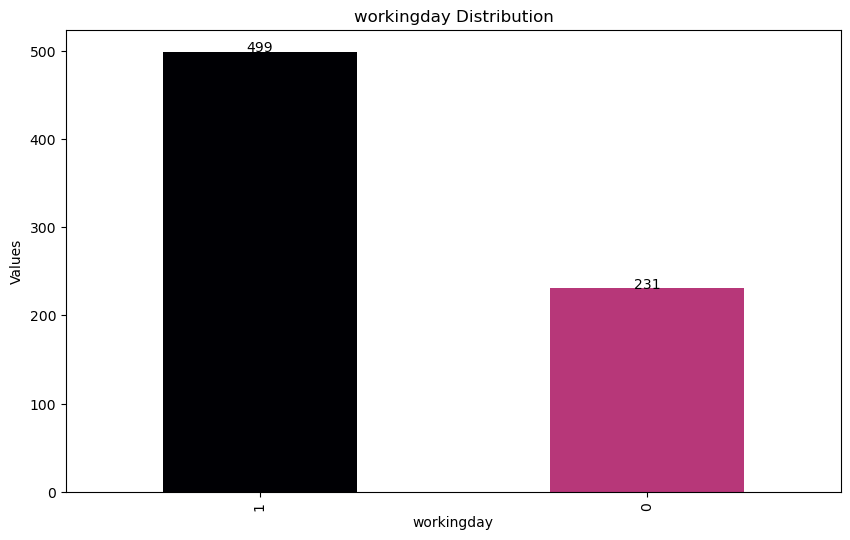

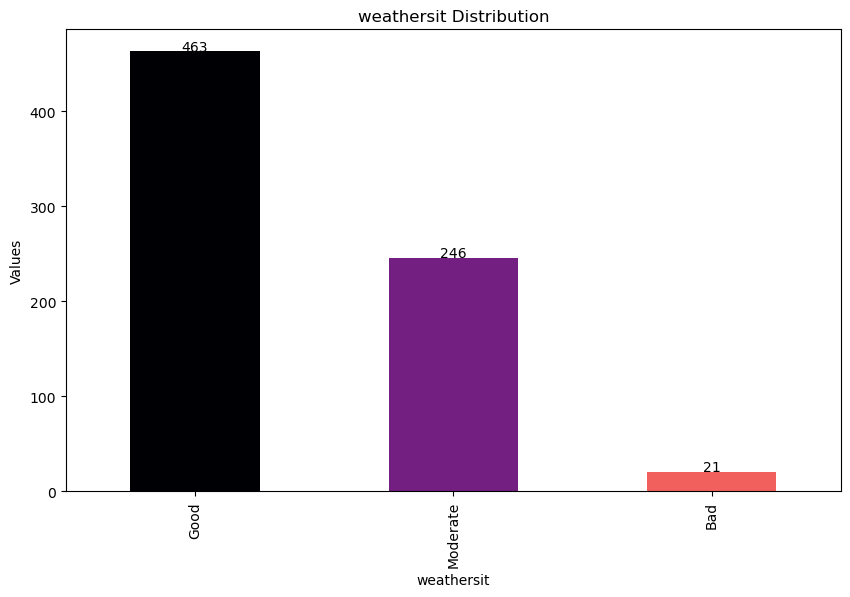

In [28]:

# Oloting the bar graph for the column "term"
create_plot_bar(day_df,column="season", title='Season Distribution', xlabel='season', ylabel='Values')

# Ploting the bar graph for the column "yr(Year)"
create_plot_bar(day_df,column="yr", title='Year Distribution', xlabel='yr', ylabel='Values')

# Ploting the bar graph for the column "mnth"
create_plot_bar(day_df,column="mnth", title='Month Distribution', xlabel='Month', ylabel='Values')

# Ploting the bar graph for the column "holiday"
create_plot_bar(day_df,column="holiday", title='Holiday Distribution', xlabel='Holiday', ylabel='Values')

# Ploting the bar graph for the column "workingday"
create_plot_bar(day_df,column="workingday", title='workingday Distribution', xlabel='workingday', ylabel='Values')

# Ploting the bar graph for the column "term"
create_plot_bar(day_df,column="weathersit", title='weathersit Distribution', xlabel='weathersit', ylabel='Values')

#### Analysis from the above graphs:
- The bike rentals are more when the weather is favourable can be observed.
- There is high preference for bikes can be observed during the working days and non holidays.
- There is minimal variation in other categorial variables

### Bivariate Analysis
- We have four continous numerical variables i.e. temp, atemp, hum and windspeed
- we have seven categorical variables i.e. season, yr(year), mnth(month), holiday, weekday, workingday, weathersit

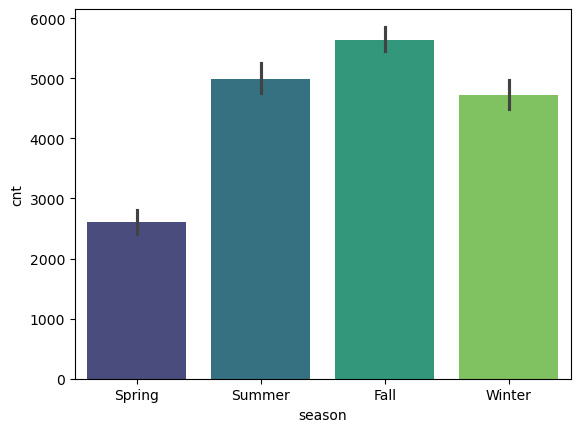

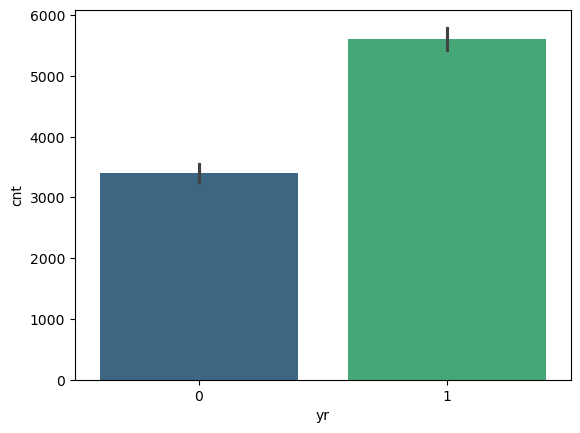

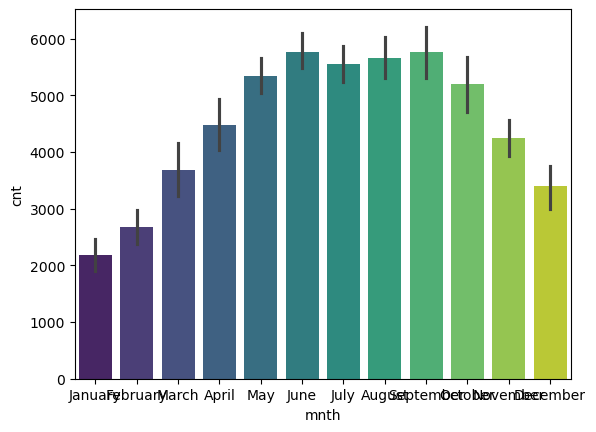

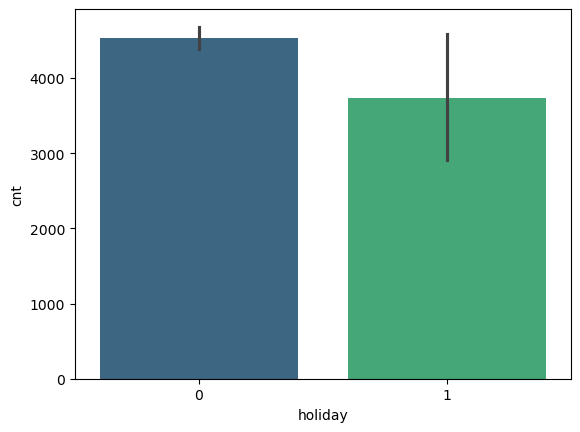

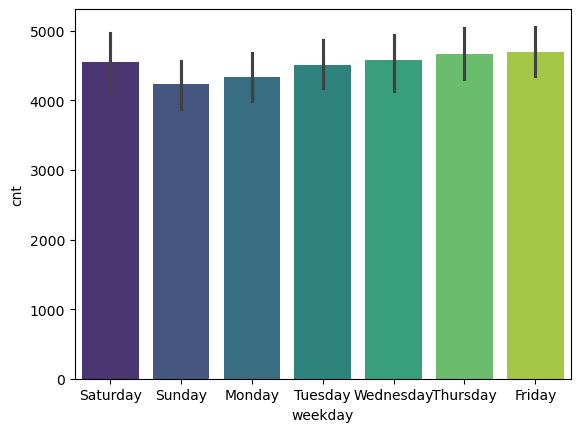

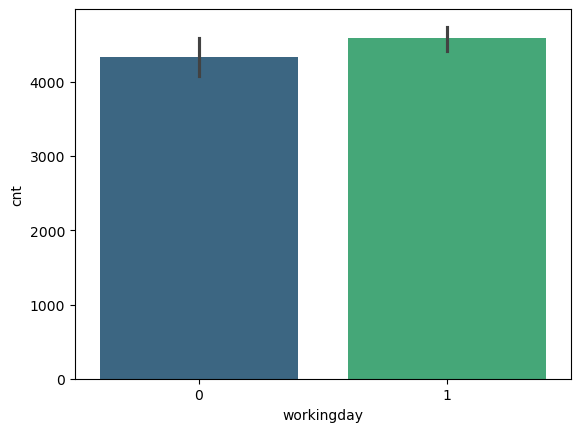

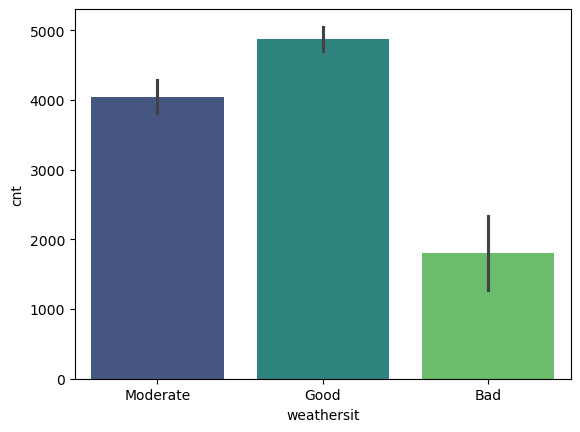

In [29]:
# Ploting the bar plots for the categorical variables i.e. season, yr(year), mnth(month), holiday, weekday, workingday, weathersit
continuous_cvars1 = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in continuous_cvars1:
    sns.barplot(data=day_df,x=i, y='cnt',palette='viridis')
    plt.show()

#### Analysis from the above graphs:
- __season:__ The fall season sees the highest number of people using Boom Bikes, while the spring season has the least.
- __mnth(month):__ Most bookings occur from May to October. The trend increases from the start of the year until mid-year, then decreases towards the end of the year.
- __Weekday:__ Sunday has the fewest users, with usage increasing from Monday to Friday.
- __weathersit(Weather Situation):__ More people tend to use bikes when the weather is clear. Working Day: Bookings are almost equal on working days and non-working days.
- __holiday:__ Bikes are used more when there is no holiday.
- __yr(Year):__ The year 2019 saw more bookings compared to the previous year.

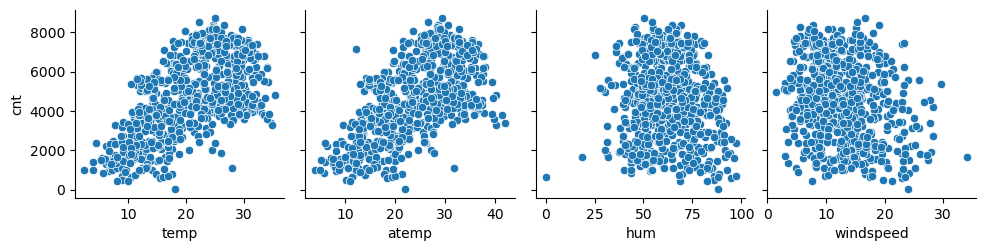

In [30]:
# Creating a pairplot between the numerical variables
sns.pairplot(data=day_df,x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')
plt.show()

From the above plot, we can see that 'temp' and 'atemp' variables are having the highest correlation with the target variable 'cnt'

### Heatmap for correlation

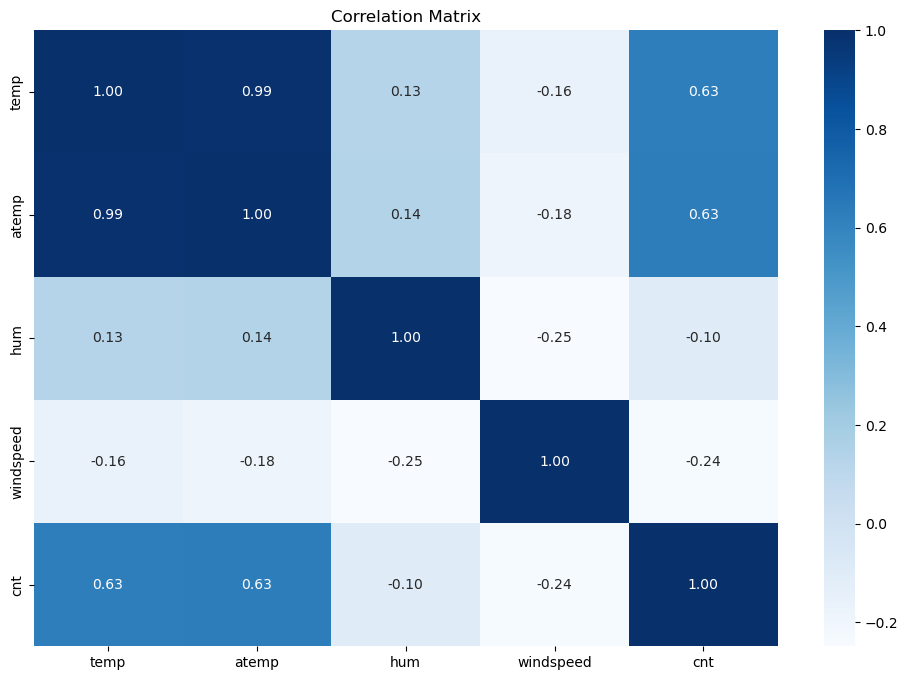

In [31]:
# Extracting the list of columns from the dataframe day_df.
columns_to_extract =  ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
extracted_df = day_df[columns_to_extract]

# Creating the cor
correlation_matrix = extracted_df.corr()

# Ploting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Analysis from the heatmap:
- Temperature and Bike Rentals: Both actual temperature (temp) and perceived temperature (atemp) show a strong correlation with the number of bike rentals (cnt), indicating that favorable temperatures encourage biking.
- Temperature Correlation: The strong correlation between temp and atemp suggests potential redundancy. Consider using feature elimination to evaluate and possibly remove one of them.
- Windspeed and Humidity: Windspeed and humidity (hum) are negatively correlated with bike rentals, indicating that higher windspeed and humidity create less favorable conditions for biking.

### Multivariate Analysis

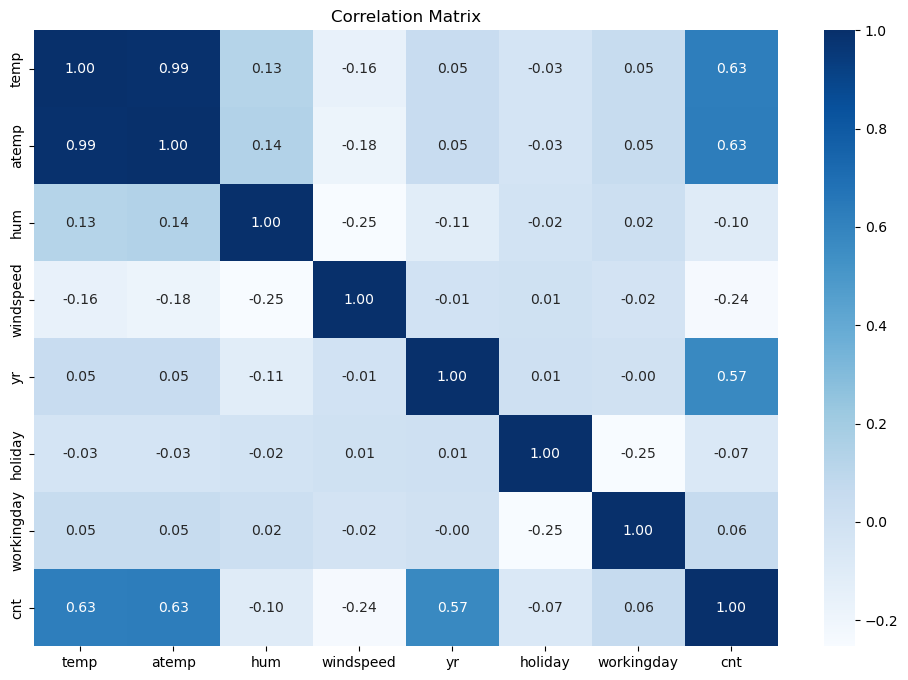

In [32]:
# Extracting the list of columns from the dataframe day_df.
columns_to_extract =  ['temp', 'atemp', 'hum', 'windspeed','yr', 'holiday','workingday', 'cnt']
extracted_df = day_df[columns_to_extract]

# Creating the cor
correlation_matrix = extracted_df.corr()

# Ploting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Analysis from the heatmap:
- Negative Correlations: There is a negative correlation between the count of bike rentals (cnt) and certain variables, specifically holidays, humidity (hum), and windspeed.
- Positive Correlations: Conversely, there is a positive correlation between cnt and other variables, such as year (yr), working days, actual temperature (temp), and perceived temperature (atemp).
- Temperature Correlation: The high correlation between temp and atemp further supports the observation that they are nearly identical, suggesting potential redundancy.

## Data Preperation

#### Dummy variables
We are creating dummy variables for the categorical variables - season, mnth, weekday, and weathersit

In [33]:
# creating dummy variables for categorical variable:

season_df=pd.get_dummies(day_df['season'],drop_first=True)
weekday_df=pd.get_dummies(day_df['weekday'],drop_first=True)
month_df = pd.get_dummies(day_df['mnth'], drop_first=True)
weathersit_df=pd.get_dummies(day_df['weathersit'],drop_first=True)

In [105]:
# Displaying the top 5 rows of the dataset
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
# Merging the dataframe with the dummy variable datasets and creating a new dataframe - "day_df_new"
day_df_new = pd.concat([day_df, season_df, weekday_df, month_df, weathersit_df], axis=1)

# Converting dummy variables to uint8
for col in [season_df, weekday_df, month_df, weathersit_df]:
    for dummy_col in col.columns:
        day_df_new[dummy_col] = day_df_new[dummy_col].astype('uint8')

In [36]:
# Displaying the top 5 rows from the dataframe
day_df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,January,July,June,March,May,November,October,September,Good,Moderate
0,Spring,0,January,0,Saturday,0,Moderate,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,0,1
1,Spring,0,January,0,Sunday,0,Moderate,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,0,1
2,Spring,0,January,0,Monday,1,Good,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,1,0
3,Spring,0,January,0,Tuesday,1,Good,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,1,0
4,Spring,0,January,0,Wednesday,1,Good,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,1,0


In [35]:
# Dropping the unnecessary columns('season','month','weekday','weathersit') as we have already created dummy variable out of it.
day_df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [36]:
# Displaying the top 5 rows from the dataframe after droping the columns
day_df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,1,0


In [37]:
# Checking the shape of new dataframe
day_df_new.shape

(730, 30)

In [38]:
# Checking the column info of new dataframe
day_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Monday      730 non-null    uint8  
 12  Saturday    730 non-null    uint8  
 13  Sunday      730 non-null    uint8  
 14  Thursday    730 non-null    uint8  
 15  Tuesday     730 non-null    uint8  
 16  Wednesday   730 non-null    uint8  
 17  August      730 non-null    uint8  
 18  December    730 non-null    uint8  
 19  February    730 non-null    u

### Splitting the Data into Training and Testing Sets

In [39]:
# Splitting the data into a 70% training set and a 30% test set.
np.random.seed(0)
df_train, df_test = train_test_split(day_df_new, train_size = 0.7, random_state = 100)

In [40]:
# Checking the shape of the train dataset
df_train.shape

(510, 30)

In [41]:
# Checking the shape of testing datatset
df_test.shape

(220, 30)

In [42]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [43]:
# Verifying the head of dataset before scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
# Verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# Displaying the descriptive statistics of the numrical columns of the dataset.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


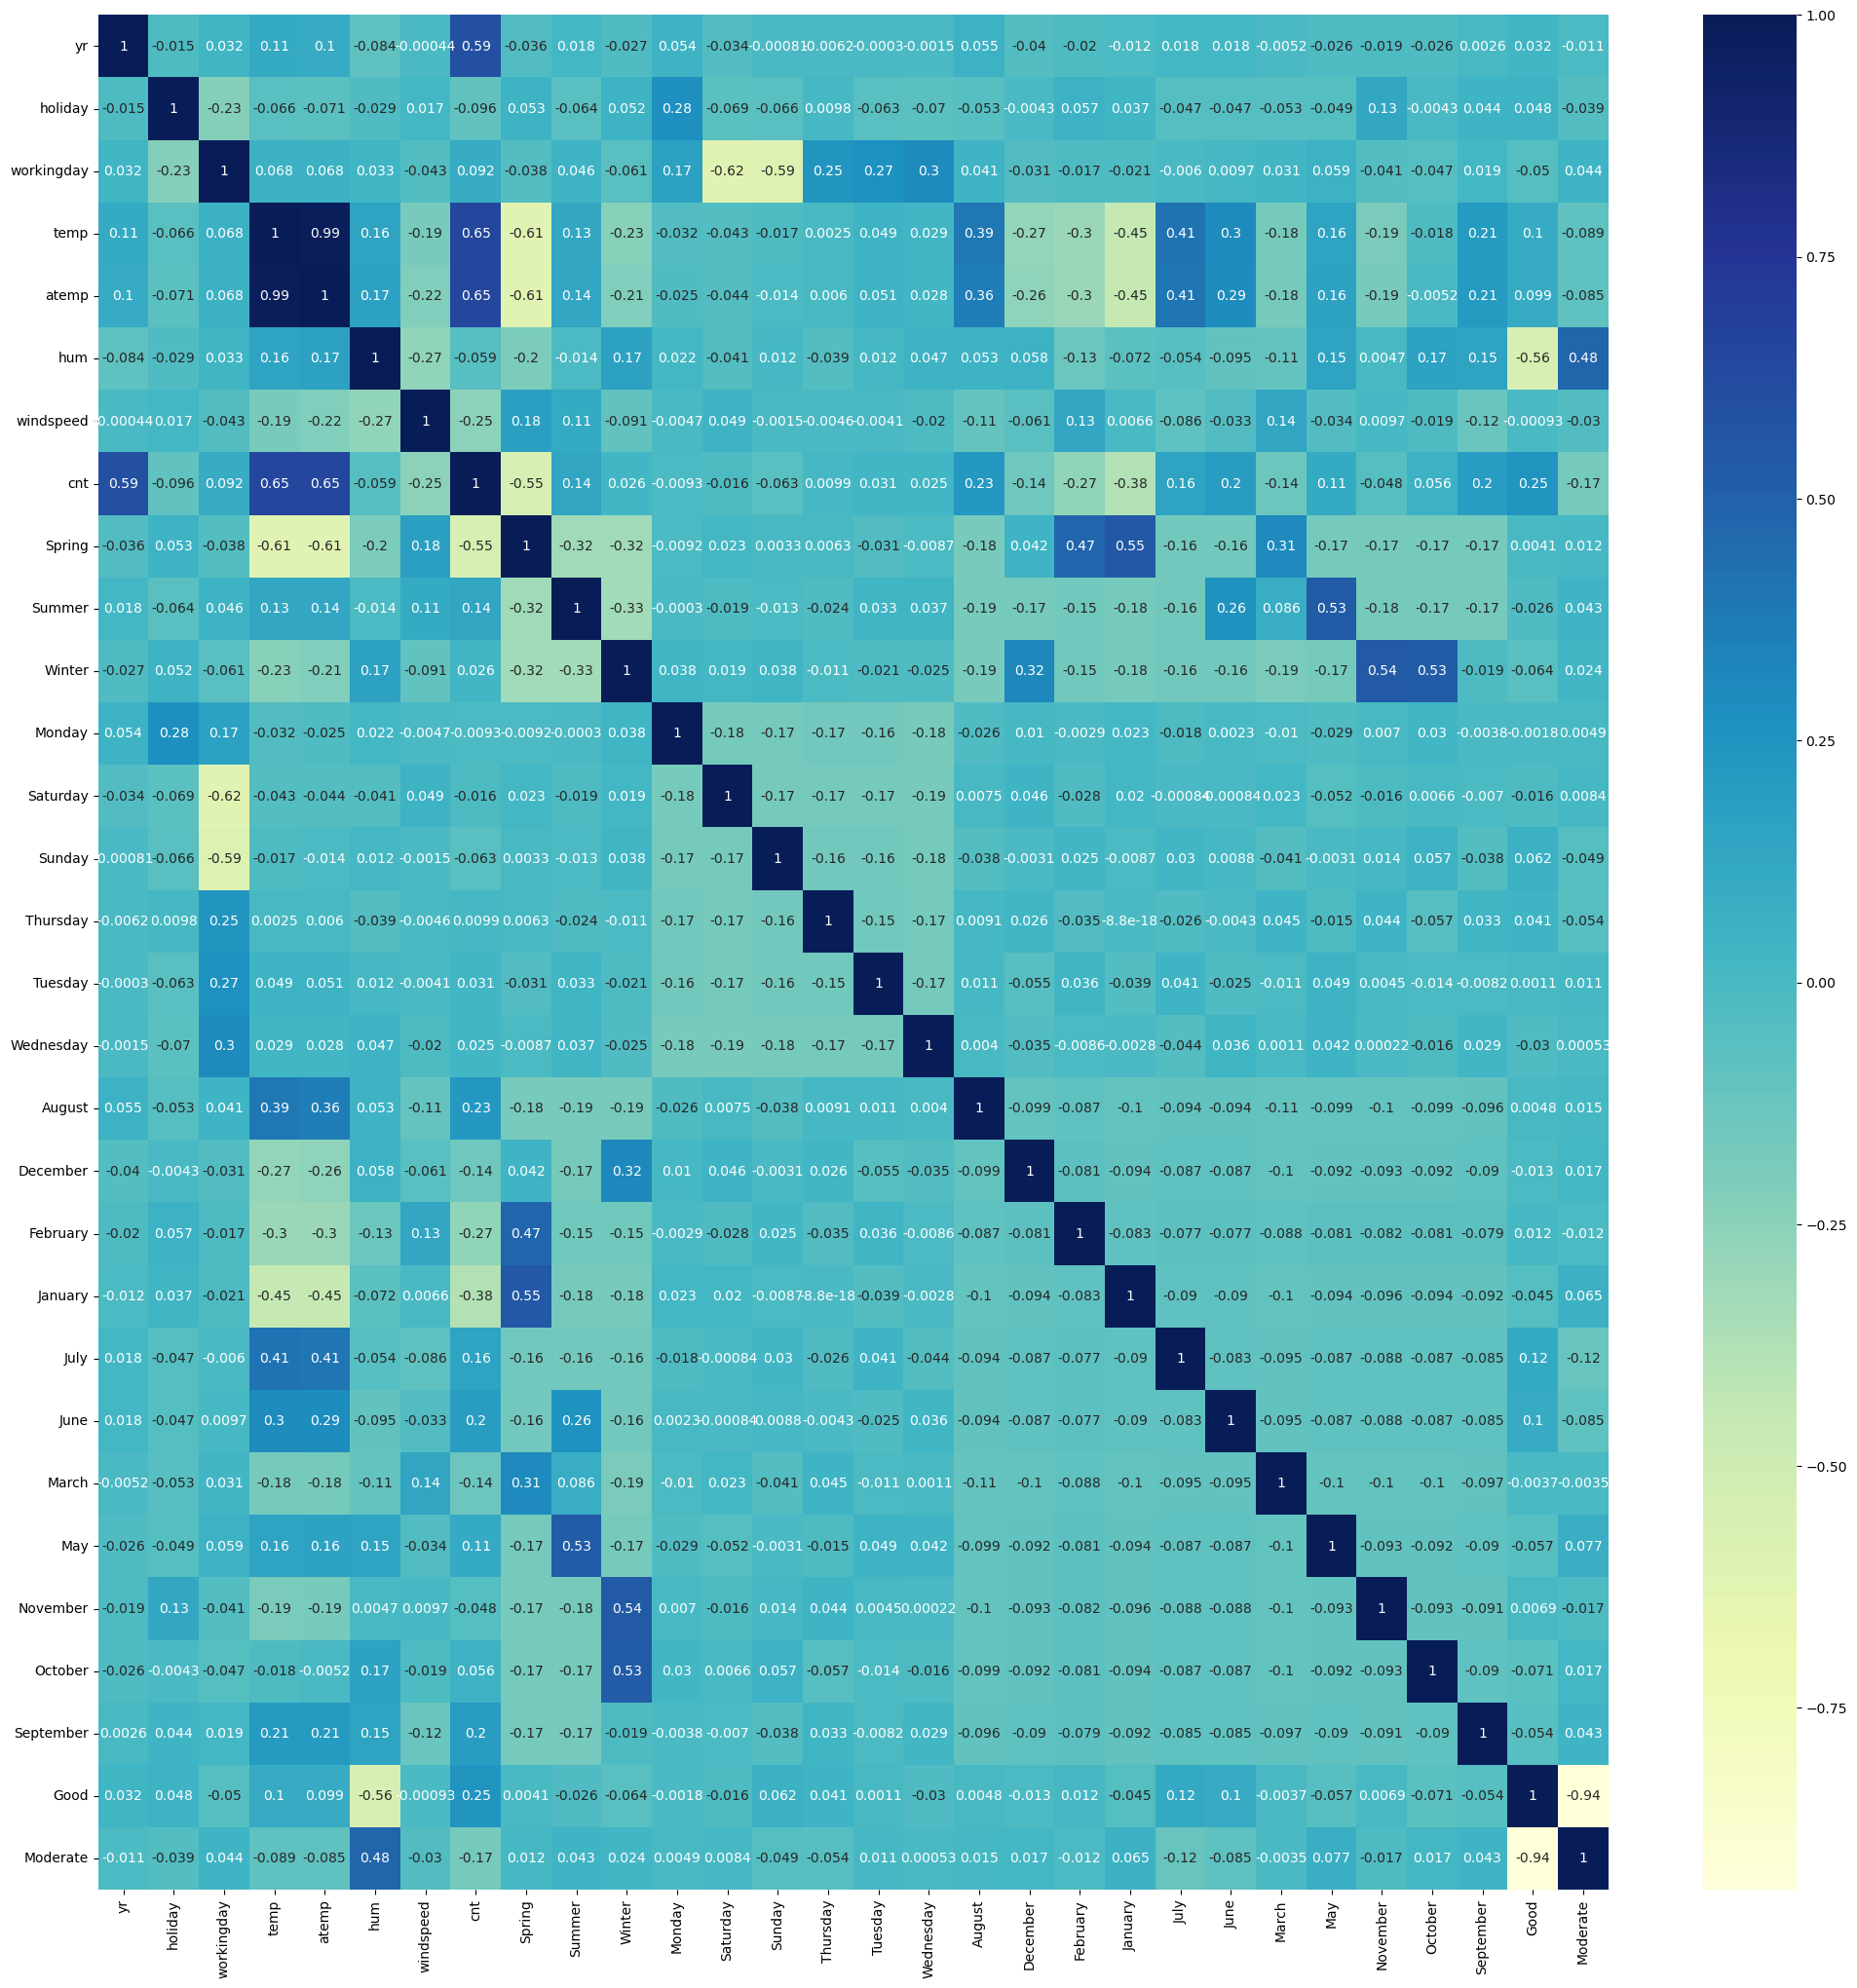

In [49]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

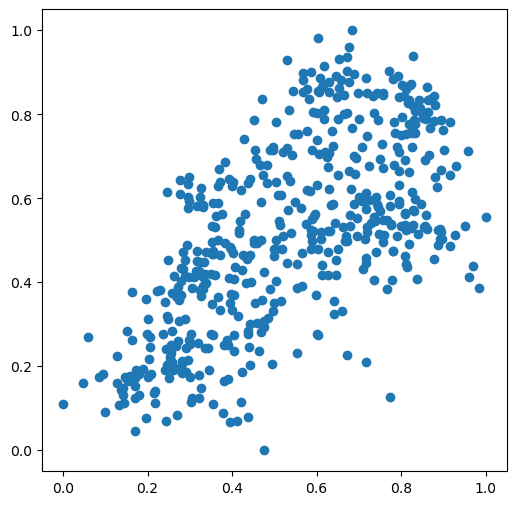

In [47]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

The Visualization confirms that there is a  positive correlation between temp and cnt

## Building the Linear Model

In [48]:
# y_train to contain only target variable
y_train = df_train.pop('cnt')


# X_train is all remainign variable also our independent variables
X_train = df_train

#### RFE

In [49]:
# Creating linear regression model with sklearn.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
# Using rfe to select some features from the model.
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
# Listing all the features after rfe.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 13),
 ('September', True, 1),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [52]:
# Get the columns which are selected using RFE approach a d saving into selected_features
selected_features = X_train.columns[rfe.support_]

In [53]:
# Listing the column names which are selected
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Saturday', 'January', 'July', 'September', 'Good',
       'Moderate'],
      dtype='object')

In [54]:
# Geting the columns which are rejected using RFE approach and saving it into rejeceted_features
rejected_features = X_train.columns[~rfe.support_]

In [55]:
# Listing the column names which are rejected
rejected_features

Index(['atemp', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October'],
      dtype='object')

### User-defind Function Definations

In [56]:
def Cal_VIF(X_train):
    """
    Calculate Variance Inflation Factor (VIF) for features in the training set.

    VIF measures how much the variance of an independent variable is increased due
    to the presence of other independent variables in the model. High VIF values
    indicate a strong correlation between variables.

    Parameters:
    - X_train (pd.DataFrame): Input features in the training set.

    Returns:
    - pd.DataFrame: DataFrame containing Features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)

In [57]:
def Gen_Model_With_Summary(X_train, y_train):
    """
     Generate and fit an Ordinary Least Squares (OLS) model using statsmodels,
     print the model summary, and return a dictionary containing the fitted model
     and the features with an added constant term.

    Parameters:
    - X_train (DataFrame): Features for the training.
    - y_train (Series): Target variable for the training.

    Returns:
    dict: A dictionary which containing the fitted OLS model ('model') and the features
          with added constant term ('X_train_lm').
    """
    X_train_lm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.summary())
    return { 'Model' : lm, 'X_train_lm' : X_train_lm }

### MODEL 1

In [58]:
# Creating new dataframe using the selected features from RFE approach forour first model
X_train_rfe1 = X_train[selected_features]

In [59]:
# Checking the shape
X_train_rfe1.shape

(510, 15)

In [60]:
# Executing the model 1:
Gen_Model_With_Summary(X_train_rfe1, y_train)
Cal_VIF(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          4.22e-191
Time:                        14:28:20   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.048      0.092      0.9

,Features,VIF
4,hum,25.63
3,temp,22.84
13,Good,14.80
14,Moderate,9.07
6,Spring,5.69
2,workingday,5.42
5,windspeed,4.69
8,Winter,4.12
7,Summer,3.21
0,yr,2.10


### MODEL 2
Droping the column hum(humidity) as the VIF value is high i.e. 25.64

In [61]:
# Droping the column 'hum' and creating new dataframe - X_train_rfe2
X_train_rfe2 = X_train_rfe1.drop(['hum'], axis = 1)

In [62]:
# Excecuting the model 2:
Gen_Model_With_Summary(X_train_rfe2, y_train)
Cal_VIF(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.60e-188
Time:                        14:28:35   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1171      0.039     -2.980      0.0

,Features,VIF
12,Good,14.79
3,temp,13.96
13,Moderate,8.48
2,workingday,5.34
4,windspeed,4.67
5,Spring,4.48
6,Summer,2.79
7,Winter,2.74
0,yr,2.08
8,Saturday,1.99


### MODEL 3
Droping the column Good as the VIF value is high i.e. 14.79

In [63]:
# Droping the column 'Good' and creating new dataframe - X_train_rfe3
X_train_rfe3 = X_train_rfe2.drop(['Good'], axis = 1)

In [64]:
# Excecuting the model 3:
Gen_Model_With_Summary(X_train_rfe3, y_train)
Cal_VIF(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.07e-162
Time:                        14:29:50   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1652      0.036      4.630      0.0

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
5,Spring,3.07
6,Summer,2.34
0,yr,2.07
7,Winter,1.96
8,Saturday,1.96
9,January,1.62
10,July,1.59


### MODEL 4
Droping the column holiday as the p value is 0.121

In [65]:
# Droping the column 'holiday' and creating new dataframe - X_train_rfe4
X_train_rfe4 = X_train_rfe3.drop(['holiday'], axis = 1)

In [66]:
# Excecuting the model 4:
Gen_Model_With_Summary(X_train_rfe4, y_train)
Cal_VIF(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          5.27e-163
Time:                        14:30:33   Log-Likelihood:                 444.62
No. Observations:                 510   AIC:                            -863.2
Df Residuals:                     497   BIC:                            -808.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1584      0.035      4.467      0.0

,Features,VIF
2,temp,6.81
1,workingday,4.66
3,windspeed,4.61
4,Spring,2.99
5,Summer,2.33
0,yr,2.07
6,Winter,1.90
7,Saturday,1.83
8,January,1.62
9,July,1.59


### MODEL 5
Droping the column January as the p value is 0.083

In [67]:
# Droping the column 'January' and creating new dataframe - X_train_rfe5
X_train_rfe5 = X_train_rfe4.drop(['January'], axis = 1)

In [68]:
# Excecuting the model 5:
Gen_Model_With_Summary(X_train_rfe5, y_train)
Cal_VIF(X_train_rfe5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.73e-163
Time:                        14:31:05   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1440      0.035      4.169      0.0

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.59
4,Spring,2.38
5,Summer,2.32
0,yr,2.06
6,Winter,1.90
7,Saturday,1.82
8,July,1.58
10,Moderate,1.54


### MODEL 6
Droping the column July as the p value is 0.013

In [69]:
# Droping the column 'July' and creating new dataframe - X_train_rfe6
X_train_rfe6 = X_train_rfe5.drop(['July'], axis = 1)

In [70]:
# Excecuting the model 6:
Gen_Model_With_Summary(X_train_rfe6, y_train)
Cal_VIF(X_train_rfe6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          2.59e-163
Time:                        14:31:32   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1348      0.035      3.903      0.0

,Features,VIF
2,temp,5.47
1,workingday,4.63
3,windspeed,4.58
4,Spring,2.29
0,yr,2.06
5,Summer,2.00
7,Saturday,1.82
6,Winter,1.74
9,Moderate,1.54
8,September,1.22


### MODEL 7
Droping the column Spring as the p value is is 0.041

In [71]:
# Droping the column 'Spring' and creating new dataframe - X_train_rfe7
X_train_rfe7 = X_train_rfe6.drop(['Spring'], axis = 1)


In [72]:
# Excecuting the model 7 and saving the values of lr.summary into Final_LR_Model :
Final_LR_Model = Gen_Model_With_Summary(X_train_rfe7, y_train)
Cal_VIF(X_train_rfe7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 04 Mar 2025   Prob (F-statistic):          1.38e-163
Time:                        14:32:29   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.021      3.751      0.0

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,yr,2.01
6,Saturday,1.68
4,Summer,1.57
8,Moderate,1.50
5,Winter,1.38
7,September,1.20


The model is satisfactory with a low Prob (F-statistic) of 1.38e-163, features displaying zero p-values and VIF values less than 5, and an R-squared value of 0.791 and an Adjusted R-squared value of 0.787. 

## Model Evaluation

In [73]:
# Fetch the final model and the X_train_sm from the final_lr_model
Model, X_train_lm = Final_LR_Model.values()

In [74]:
# Predict the value for y_train_pred using Model.predict function
y_train_pred = Model.predict(X_train_lm)

### Residual Analysis

<Figure size 800x500 with 0 Axes>

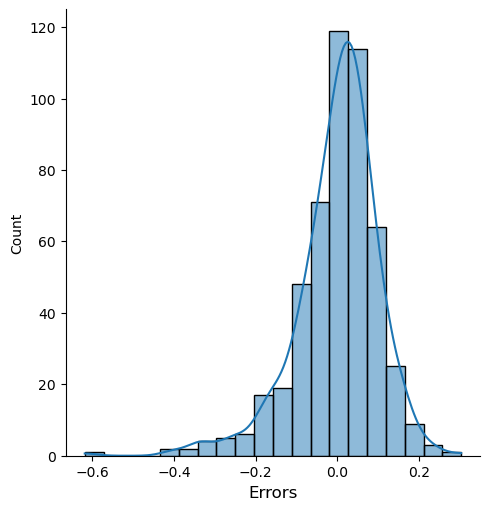

In [75]:
# Plot the histogram of the error terms on the training set for checking Residual
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

### Homoscedasticity

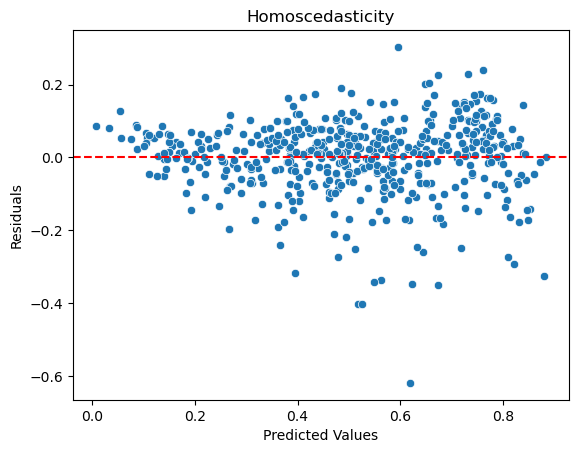

In [76]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

### Linear regression fit line - For Trained Data

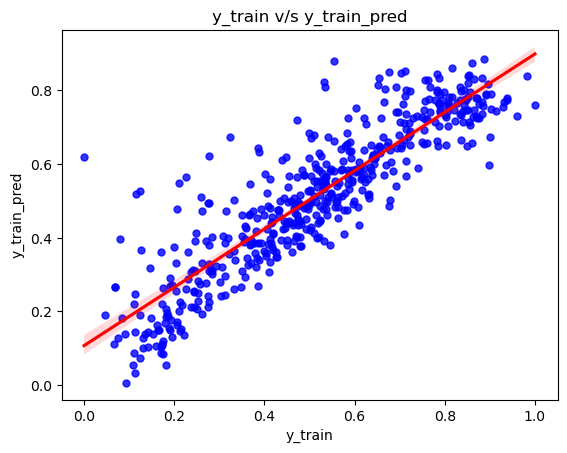

In [116]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Showing the plot and adding the description
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

### Calculating Mean Squared Error(MSE) and Root Mean Squared Error(RMSE) - Trained Dataset

In [77]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE - Root mean squared error
rmse_train = np.sqrt(mse_train)

print(rmse_train)

0.10255217245978933


### Predict Using the Final Model on the test set

In [78]:
# Applying scaling on the test dataset

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,1,0,0,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,1,0,0,0,0,0,1,0


In [79]:
# Displaying the descriptive statistics of the numrical columns of the dataset.
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,January,July,June,March,May,November,October,September,Good,Moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# Poping out the target variable - cnt and saving it into y_test
y_test = df_test.pop('cnt')

# X_test contains all the remainig variable including our independent variables
X_test = df_test

In [81]:
# Retain only the selected feature from the final model
X_test= X_test[X_train_rfe7.columns]
X_test.head()

,yr,workingday,temp,windspeed,Summer,Winter,Saturday,September,Moderate
184,0,0,0.837241,0.149393,0,0,0,0,1
535,1,1,0.911423,0.231142,1,0,0,0,0
299,0,1,0.496221,0.443398,0,1,0,0,1
221,0,1,0.890387,0.449707,0,0,0,0,0
152,0,1,0.821739,0.682387,1,0,0,0,0


In [82]:
# Add constant to the test set
X_test_lm = sm.add_constant(X_test)

In [83]:
# Get the predicted values from the linear model
y_test_pred = Model.predict(X_test_lm)

Calculating R Square Scores and Adjusted R Square Scores for the test set

In [84]:
# Calculating R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 3)
print ("The R2 Score for the test set is",r2_score_test)

The R2 Score for the test set is 0.755


In [85]:
# Function to calculate the Adjusted R2 Score
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2

In [86]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test.columns)), 3)
print ("The Adjusted R2 Score for the test set is",adj_r2_score_test)

The Adjusted R2 Score for the test set is 0.744


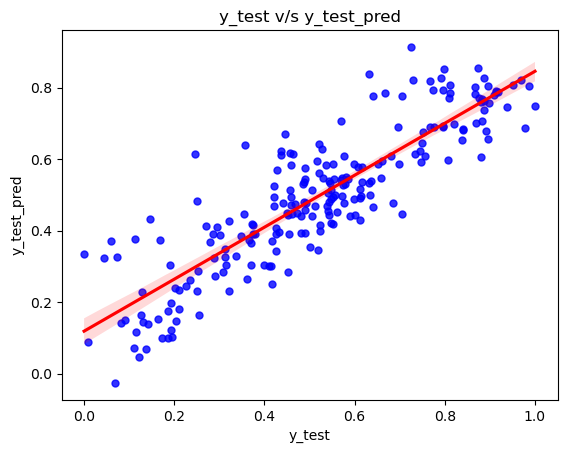

In [127]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

### Calculating Mean Squared Error(MSE) and Root Mean Squared Error(RMSE) - Test Dataset

In [87]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

0.11829613413251332


### Coefficients of the final model

In [88]:
# The Coefficients of the final model:
round(Model.params, 2)

const         0.08
yr            0.24
workingday    0.05
temp          0.55
windspeed    -0.18
Summer        0.09
Winter        0.12
Saturday      0.06
September     0.09
Moderate     -0.07
dtype: float64

##### We can see that the equation of our best fitted line is:

__cnt = 0.08 + 0.24 x yr + 0.05 x workingday + 0.55 x temp - 0.18 x windspeed + 0.09 X Summer +  0.12 x Winter + 0.06 X Saturday + 0.09 X September - 0.07 X Moderate__

#### R2 and Adjusted R2 scores of trained and test data

In [130]:
# Geting R2 Score for Training set
R2_Score_Train = round(Model.rsquared, 3)
Adjusted_R2_Score_Train = round(Model.rsquared_adj, 3)

print(f'Training Set:\n R2: {R2_Score_Train} \n Adjusted R2: {Adjusted_R2_Score_Train}\n')
print(f'Test Set:\n R2: {r2_score_test} \n Adjusted R2: {adj_r2_score_test}\n\n')

Training Set:
 R2: 0.791 
 Adjusted R2: 0.787

Test Set:
 R2: 0.755 
 Adjusted R2: 0.744




### CONCLUSION:
- The equation of our best fitted line is as follows:
  - __cnt = 0.08 + 0.24 x yr + 0.05 x workingday + 0.55 x temp - 0.18 x windspeed + 0.09 X Summer +  0.12 x Winter + 0.06 X Saturday + 0.09 X September - 0.07 X Moderate__
- The linear regression model demonstrates strong generalization, as evidenced by the near-identical R² and Adjusted R² values for both the training (R²: 0.791 , Adjusted R²: 0.787) and test sets (R²: 0.756, Adjusted R²: 0.745). This close match indicates that the model has successfully avoided overfitting, suggesting it will likely maintain consistent performance when applied to new, unseen data.
- The highest coefficient values are observed in the three key feature variables— __temp(temperature), yr(year), and Winter__ —indicating their significant impact.
- Factors influencing bike demand include **yr**, **workingday**, **temp**, , **windspeed**, **Summer**, **Winter**, **September**, and **Sunday**.

### RECOMENDATIONS:
- As per the model,temperature, year, and winter, as they have the biggest impact on bike demand.
- We can create special deals for summer and winter to attract more riders.
- Based on the weather conditions, give discounts or incentives when the weather is nice to encourage more bike rides.
- Make sure you have enough bikes available during busy times based on the important features.
- Use this model to understand bike demand in the American market and improve your business strategies.